<a href="https://colab.research.google.com/github/shivrajsjadhav/EDA-Capstone-hotel-booking-data/blob/main/Shivraj's_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#uploading a csv file
hotel_booking = pd.read_csv("/content/drive/MyDrive/EDA Hotel booking/Copy of Hotel Bookings.csv")

In [4]:
#to see column names in a data
hotel_booking.head(10).T

,0,1,2,3,4,5,6,7,8,9
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1
lead_time,342,737,7,13,14,14,0,9,85,75
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3
adults,2,2,1,1,2,2,2,2,2,2


In [5]:
hotel_booking.stays_in_weekend_nights.unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

<b>hotel_Types - Resort Hotel and City Hotel <br>
is_canceled - tells us where booking was cancelled or not <br>
lead_time - the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.<br>
arrival_date_year - gives year of arrival of a guest <br>
arrival_date_Month - gives year of arrival of a guest <br>
arrival_date_week_number - week no of arrival of a guest in given year <br>
arrival_date_day_of_month - day of arrival in a month <br>
stays_in_weekend_nights - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel <br>
stays_in_week_nights - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel <br>
adults - no of adults <br>
children - no of children <br>
babies - no of babies <br>
meal - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal <br>
country -Country of origin <br>
market_segment -Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” <br>
distributed_channel - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” <br>
is_repeated_guest -Value indicating if the booking name was from a repeated guest (1) or not (0) <br>
previous_cancellations -Number of previous bookings that were cancelled by the customer prior to the current booking <br>
previous_bookings_not_canceled - Number of previous bookings not cancelled by the customer prior to the current booking <br>
reserved_room_type -Code of room type reserved. Code is presented instead of designation for anonymity reasons. <br>
assigned_room_type -Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due <br>
booking_changes -Number of changes/amendments made to the booking from the moment the booking was entered on the PMS <br>
deposit_type - Indication on if the customer made a deposit to guarantee the booking. <br>
agent - ID of the travel agency that made the booking <br>
company -ID of the company/entity that made the booking or responsible for paying the booking. <br>
days_in_waiting_list - Number of days the booking was in the waiting list before it was confirmed to the customer <br>
customer_type -Type of booking, assuming one of four categories <br>
adr -Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights <br>
required_car_parking_spaces - Number of car parking spaces required by the customer <br>
total_of_special_requests - Number of special requests made by the customer <br>
reservation_status -Reservation last status <br>
reservation_status_date -Date at which the last status was set.

In [6]:
#let us find out length
len(hotel_booking)

119390

In [7]:
#let us find out no of rows and columns in a dataframe
hotel_booking.shape

(119390, 32)

In [8]:
#to find data type of each column
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#to find out if null values are present in a column of a dataset
hotel_booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
hotel_booking['children'].fillna(0,inplace=True)
hotel_booking['country'].fillna('XYZ',inplace=True)

In [14]:
hotel_booking.drop(['agent','company'],axis=1,inplace=True)

In [15]:
hotel_booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
hotel_booking.shape

(119390, 30)

In [19]:
import seaborn as sns

#What are the Top 10 Countries of Origin of Hotel visitors (Guests)?

In [25]:
#What are the Top 10 Countries of Origin of Hotel visitors (Guests)?
top_ten_countries =hotel_booking['country'].value_counts().head(10)
print(top_ten_countries)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64


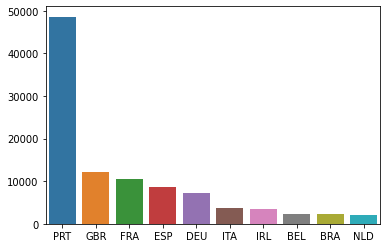

In [16]:
sns.barplot(y=list(hotel_booking.country.value_counts().head (10)),x= list(hotel_booking.country.value_counts().head(10).index))

#Which Month is the Most Occupied with Bookings at the Hotel?

In [18]:
#Which Month is the Most Occupied with Bookings at the Hotel?
hotel_booking['arrival_date_month'].value_counts(sort= False)

July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
Name: arrival_date_month, dtype: int64

Text(0.5, 0, 'Month')

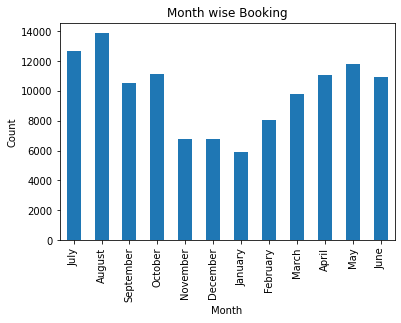

In [19]:

hotel_booking['arrival_date_month'].value_counts(sort=False).plot(kind='bar')

plt.title('Month wise Booking')
plt.ylabel('Count')
plt.xlabel('Month')

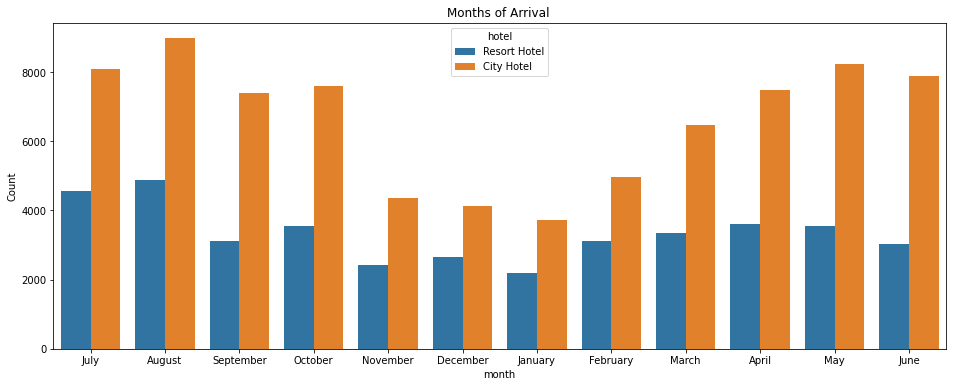

In [20]:
plt.figure(figsize=(16,6))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= hotel_booking)

plt.title('Months of Arrival ')
plt.ylabel('Count')
plt.xlabel('month')
plt.show()

#3.How many Bookings were Cancelled at the Hotel?<b>

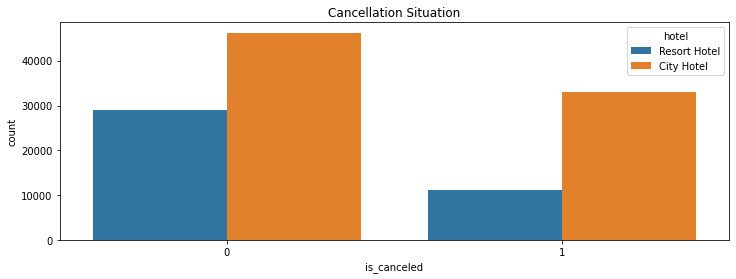

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x='is_canceled', hue = 'hotel', data= hotel_booking)
plt.title('Cancellation Situation')
plt.show()

Text(0.5, 0, 'Pcountry')

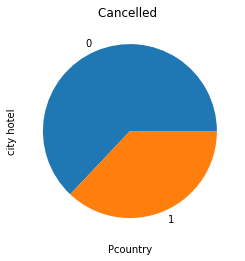

In [22]:
hotel_booking['is_canceled'].value_counts().plot(kind='pie')

plt.title('Cancelled ')
plt.ylabel('city hotel')
plt.xlabel('Pcountry')

#4.Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status <b>

Text(0, 0.5, 'ADR')

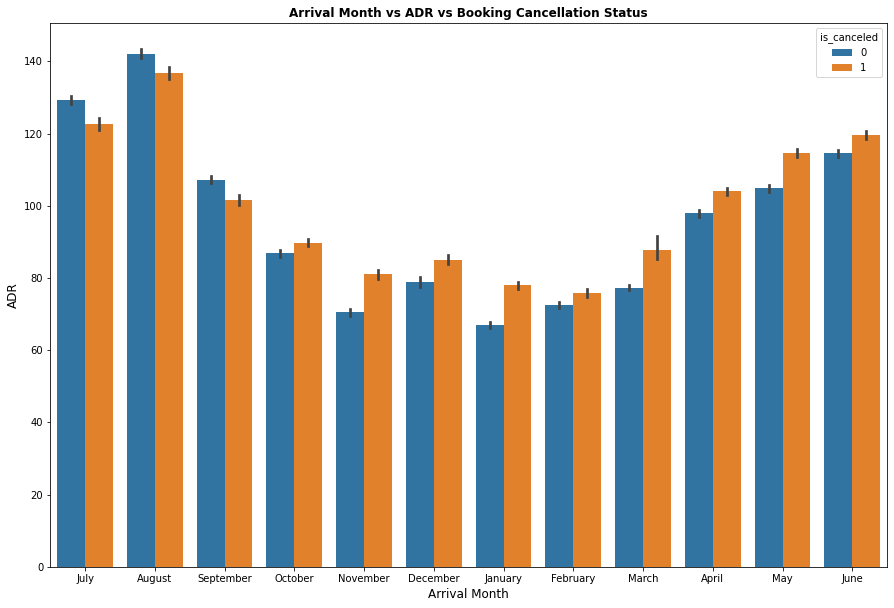

In [23]:
hotel_booking['adr'] = hotel_booking['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', data=hotel_booking)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

#5. Relationship between Lead time and arrival date year by booking cancellation status <b>

Text(0, 0.5, 'lead_time')

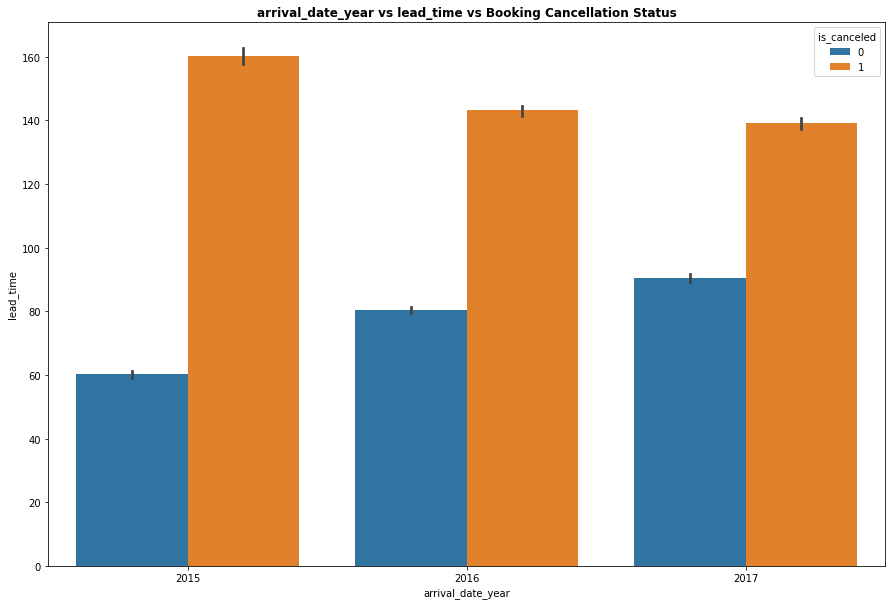

In [24]:
hotel_booking['lead_time'] = hotel_booking['lead_time'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', dodge=True, data=hotel_booking)
plt.title('arrival_date_year vs lead_time vs Booking Cancellation Status', weight='bold')
plt.xlabel('arrival_date_year', fontsize=10)
plt.ylabel('lead_time', fontsize=10)

#6. Effect of Deposit Type on cancellations <b>

In [22]:
hotel_booking.deposit_type.unique()
hotel_booking.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

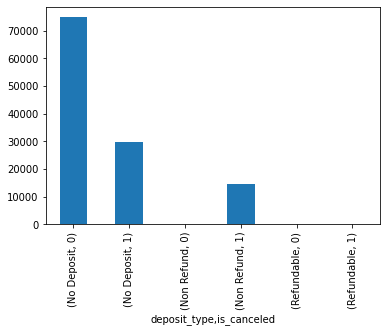

In [24]:
hotel_booking.groupby(['deposit_type','is_canceled'])['is_canceled'].count().plot(kind='bar')

#Optimal length of stay in order to get best daily rate <b>

In [27]:
hotel_booking['total_staying_nights'] = hotel_booking['stays_in_week_nights'] + hotel_booking['stays_in_weekend_nights']

In [35]:
hotel_booking[['total_staying_nights','adr']]

,total_staying_nights,adr
0,0,0.00
1,0,0.00
2,1,75.00
3,1,75.00
4,2,98.00
...,...,...
119385,7,96.14
119386,7,225.43
119387,7,157.71
119388,7,104.40


In [54]:
length_of_stay=hotel_booking.groupby('total_staying_nights')
df=length_of_stay.mean()
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
total_staying_nights,,,,,,,,,,,,,,,,,,
0,0.048951,28.479720,2015.986014,28.401399,15.639161,0.000000,0.000000,1.544056,0.068531,0.006993,0.426573,0.011189,0.127273,0.292308,0.137063,0.000000,0.023776,0.499301
1,0.250761,45.471265,2016.157517,26.186632,15.976736,0.217364,0.782636,1.664034,0.088297,0.007088,0.085062,0.061465,0.402236,0.170790,0.881779,94.697787,0.100000,0.514082
2,0.440003,122.413739,2016.057411,27.302355,15.917447,0.435843,1.564157,1.831531,0.074087,0.005137,0.033426,0.167384,0.141591,0.188040,3.029990,97.723088,0.057808,0.461491
3,0.419227,111.795465,2016.199623,27.023637,15.630078,0.814190,2.185810,1.893522,0.093625,0.005651,0.016103,0.067514,0.098537,0.192421,4.004875,105.152492,0.046794,0.552814
4,0.365760,105.279699,2016.210608,27.109705,15.838175,1.130415,2.869585,1.950756,0.112984,0.007536,0.008284,0.045734,0.038141,0.236035,2.327389,104.970035,0.048035,0.654202
5,0.342112,102.642729,2016.207091,27.615750,16.122045,1.476876,3.523124,1.943988,0.155576,0.013875,0.005910,0.017857,0.018114,0.289697,1.332991,113.223704,0.069758,0.734969
6,0.397978,117.129634,2016.145191,28.901219,16.292715,1.691989,4.308011,1.925849,0.185377,0.013482,0.008037,0.203526,0.012186,0.331605,2.199637,119.876025,0.077521,0.732175
7,0.343039,139.683651,2016.207510,27.954708,15.603697,2.000000,5.000000,1.982669,0.142692,0.016984,0.005661,0.090699,0.011554,0.287002,0.725592,103.422341,0.056037,0.665627
8,0.379845,114.666667,2016.091301,27.684755,15.441860,2.267011,5.732989,1.901809,0.180879,0.019811,0.009475,0.039621,0.067183,0.395349,0.258398,113.954574,0.085271,0.723514


In [100]:
hb_confirmed =hotel_booking[(hotel_booking.is_canceled==0)]

In [102]:
hb_confirmed.shape

(75166, 31)

In [103]:
Grouped_data= hb_confirmed.groupby('arrival').agg({'adr': 'mean'})

Text(0.5, 0, 'total staying nights')

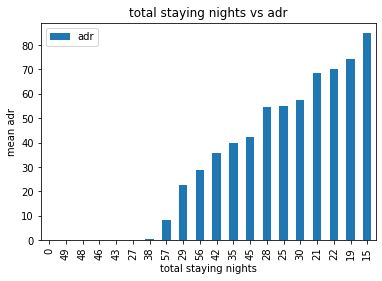

In [106]:
hb_confirmed.groupby('total_staying_nights').agg({'adr': 'mean'}).sort_values(by='adr',ascending=True).head(20).plot(kind='bar')
plt.title('total staying nights vs adr')
plt.ylabel('mean adr')
plt.xlabel('total staying nights')

In [43]:
length_of_stay.mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
total_staying_nights,,,,,,,,,,,,,,,,,,
0,0.048951,28.479720,2015.986014,28.401399,15.639161,0.000000,0.000000,1.544056,0.068531,0.006993,0.426573,0.011189,0.127273,0.292308,0.137063,0.000000,0.023776,0.499301
1,0.250761,45.471265,2016.157517,26.186632,15.976736,0.217364,0.782636,1.664034,0.088297,0.007088,0.085062,0.061465,0.402236,0.170790,0.881779,94.697787,0.100000,0.514082
2,0.440003,122.413739,2016.057411,27.302355,15.917447,0.435843,1.564157,1.831531,0.074087,0.005137,0.033426,0.167384,0.141591,0.188040,3.029990,97.723088,0.057808,0.461491
3,0.419227,111.795465,2016.199623,27.023637,15.630078,0.814190,2.185810,1.893522,0.093625,0.005651,0.016103,0.067514,0.098537,0.192421,4.004875,105.152492,0.046794,0.552814
4,0.365760,105.279699,2016.210608,27.109705,15.838175,1.130415,2.869585,1.950756,0.112984,0.007536,0.008284,0.045734,0.038141,0.236035,2.327389,104.970035,0.048035,0.654202
5,0.342112,102.642729,2016.207091,27.615750,16.122045,1.476876,3.523124,1.943988,0.155576,0.013875,0.005910,0.017857,0.018114,0.289697,1.332991,113.223704,0.069758,0.734969
6,0.397978,117.129634,2016.145191,28.901219,16.292715,1.691989,4.308011,1.925849,0.185377,0.013482,0.008037,0.203526,0.012186,0.331605,2.199637,119.876025,0.077521,0.732175
7,0.343039,139.683651,2016.207510,27.954708,15.603697,2.000000,5.000000,1.982669,0.142692,0.016984,0.005661,0.090699,0.011554,0.287002,0.725592,103.422341,0.056037,0.665627
8,0.379845,114.666667,2016.091301,27.684755,15.441860,2.267011,5.732989,1.901809,0.180879,0.019811,0.009475,0.039621,0.067183,0.395349,0.258398,113.954574,0.085271,0.723514


#Percentage of Bookings canceled from Total no. of bookings

Text(0.5, 1.0, 'percentage of hotel bookings Canceled')

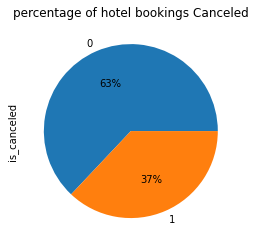

In [84]:
hotel_booking['is_canceled'].value_counts().plot(kind='pie',autopct='%1.0f%%')

plt.title('percentage of hotel bookings Canceled')


#Total no of Bookings by Market Segment

Text(0.5, 1.0, 'Bookings by Market Segment ')

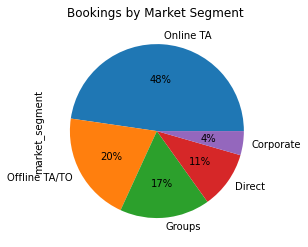

In [86]:
hotel_booking['market_segment'].value_counts().head().plot(kind='pie',autopct='%1.0f%%')

plt.title('Bookings by Market Segment ')

#Arrival per year

Text(0.5, 0, 'Year')

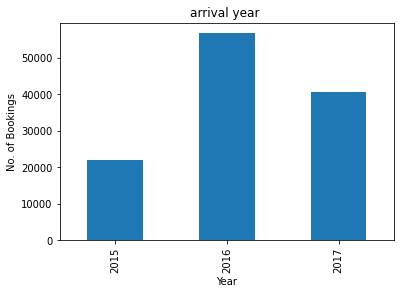

In [93]:

hotel_booking['arrival_date_year'].sort_index().value_counts(sort=False).plot(kind='bar')

plt.title('arrival year ')
plt.ylabel('No. of Bookings')
plt.xlabel('Year')

#Preferred Meal Type

In [108]:
hotel_booking.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [111]:
hb=hotel_booking['meal'].value_counts().head(10)
hb

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Text(0.5, 1.0, 'Prefered Meal types')

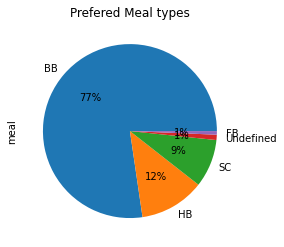

In [113]:
hotel_booking['meal'].value_counts().head(10).plot(kind='pie',autopct='%1.0f%%')

plt.title('Prefered Meal types')


#Parking space

In [116]:
hotel_booking.required_car_parking_spaces.value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

Text(0.5, 0, 'no. of parking spaces by hotel type')

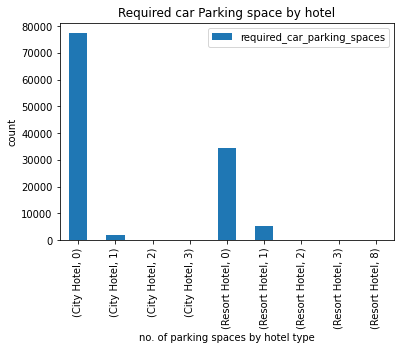

In [122]:
hotel_booking.groupby(['hotel','required_car_parking_spaces'])['required_car_parking_spaces'].count().plot(kind='bar',legend= True)
plt.title('Required car Parking space by hotel')
plt.ylabel('count')
plt.xlabel('no. of parking spaces by hotel type')

#Reserved Room and Assigned Room

In [27]:
hotel_booking.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [28]:
hotel_booking.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [29]:
hotel_booking[['reserved_room_type','assigned_room_type']]

,reserved_room_type,assigned_room_type
0,C,C
1,C,C
2,A,C
3,A,A
4,A,A
...,...,...
119385,A,A
119386,E,E
119387,D,D
119388,A,A
